<a href="https://colab.research.google.com/github/adindasyv/2141720096-machinelearning-2023/blob/master/Week%2011/tugas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS 2 : Buatlah model CNN untuk klasifikasi dataset MNIST.

Import Library

In [10]:
import tensorflow as tf
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras import layers
from keras import backend as k
from tensorflow.keras import layers, models

Load Dataset

In [3]:
# Memuat dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Normalisasi Data

In [4]:
# Normalisasi pixel values ke rentang [0, 1]
img_rows, img_cols=28, 28

if k.image_data_format() == 'channels_first':
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   inpx = (1, img_rows, img_cols)

else:
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   inpx = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Membuat Model CNN

In [7]:
# Membangun model CNN
model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size=(3,3), input_shape=inpx, activation='elu'))
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='elu'))
model.add(layers.MaxPooling2D(pool_size=(3,3)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               1048832   
                                                      

Kompilasi Model

In [8]:
# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs=30,
                    validation_data=(x_test, y_test))

Epoch 1/30
1875/1875 [==============================] - 20s 4ms/step - loss: 0.1458 - accuracy: 0.9559 - val_loss: 0.0442 - val_accuracy: 0.9855
Epoch 2/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0568 - accuracy: 0.9826 - val_loss: 0.0394 - val_accuracy: 0.9865
Epoch 3/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0439 - accuracy: 0.9862 - val_loss: 0.0403 - val_accuracy: 0.9875
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0364 - accuracy: 0.9888 - val_loss: 0.0299 - val_accuracy: 0.9897
Epoch 5/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0319 - accuracy: 0.9900 - val_loss: 0.0331 - val_accuracy: 0.9892
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0285 - accuracy: 0.9905 - val_loss: 0.0325 - val_accuracy: 0.9879
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0268 - accuracy: 0.9912 - val_loss: 0.0314 - val_accurac

Evaluasi Model

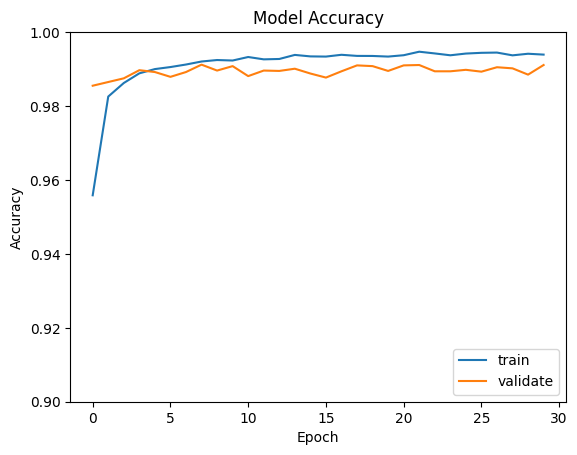

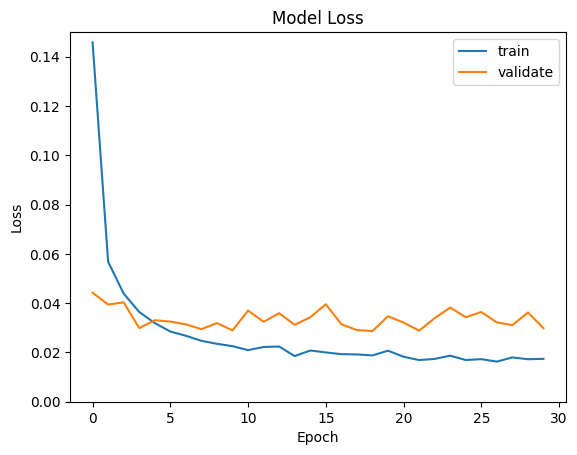

In [11]:
# Model Accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label = 'validate')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')
plt.title("Model Accuracy")
plt.show()

# Model Loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label = 'validate')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.15])
plt.legend(loc='upper right')
plt.title("Model Loss")
plt.show()

In [13]:
# Evaluasi model pada data uji
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# Cetak hasil akurasi
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

313/313 - 1s - loss: 0.0298 - accuracy: 0.9911 - 984ms/epoch - 3ms/step
Test Accuracy: 0.991100013256073
Test Loss: 0.029836928471922874


### Kesimpulan

Berdasarkan pada output yang dihasilkan, test accuracy didapatkan hasil sebesar 99.11% dan test loss sebesar 0,0298. Hal ini menunjukan bahwa model memiliki tingkat akurasi yang sangat tingi dan loss yang rendah, menandakan bahwa model ini memiliki kemampuan yang baik untuk mengenali dan mngklasifikasikan digit dari dataset MNIST